In [1]:
import os
# from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# to ignore warnings
import warnings
warnings.filterwarnings("ignore")

## EXPLORATORY DATA ANALYSIS

In [3]:
from google.colab  import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data_path='/content/drive/MyDrive/Colab Notebooks/paddy-disease-classification/train_images'

In [5]:
directory_names = os.listdir(data_path)

for directory in directory_names:
    dir_path = os.path.join(data_path, directory)
    if os.path.isdir(dir_path):
        files = os.listdir(dir_path)
        print(f"{len(files)} \t {directory}")
        for file in files:
          file_path = os.path.join(dir_path, file)
          if file.endswith('.csv'):
              data_path = pd.read_csv(file_path)
              print(f"\nData in {file}:\n{data_path.head()}\n")

1594 	 hispa
1738 	 blast
1764 	 normal
479 	 bacterial_leaf_blight
620 	 downy_mildew
1088 	 tungro
380 	 bacterial_leaf_streak
965 	 brown_spot
1442 	 dead_heart
337 	 bacterial_panicle_blight


In [6]:
csv_file_path = '/content/drive/MyDrive/Colab Notebooks/paddy-disease-classification/train.csv'
meta = pd.read_csv(os.path.join(data_path, csv_file_path))
meta.head()

image_id                  label variety  age
0  100330.jpg  bacterial_leaf_blight   ADT45   45
1  100365.jpg  bacterial_leaf_blight   ADT45   45
2  100382.jpg  bacterial_leaf_blight   ADT45   45
3  100632.jpg  bacterial_leaf_blight   ADT45   45
4  101918.jpg  bacterial_leaf_blight   ADT45   45

In [32]:
# import matplotlib.image as mpimg

# # Set the main directory path
# main_dir = '/content/drive/MyDrive/Colab Notebooks/paddy-disease-classification'

# # Navigate to the train images directory
# train_dir = os.path.join(main_dir, 'train_images')

# # List all subdirectories within the train images directory
# subdirectories = [subdir for subdir in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, subdir))]

# # Limit the number of displayed subdirectories to fit within a 3x6 grid
# max_subdirectories = min(8, len(subdirectories))
# subdirectories = subdirectories[:max_subdirectories]

# # Set up a 3x6 grid of subplots for displaying images
# plt.figure(figsize=(20, 10))
# for i, subdir in enumerate(subdirectories):
#     subdir_path = os.path.join(train_dir, subdir)

#     # List all image files in the current subdirectory
#     image_files = [file for file in os.listdir(subdir_path) if file.lower().endswith(('.png', '.jpg', '.jpeg'))]

#     # Display a few images from the current subdirectory
#     for j in range(min(6, len(image_files))):  # Display up to 8 images
#         if (i * 8 + j) >= 24:
#             break  # Break loop if we have displayed 24 images
#         image_path = os.path.join(subdir_path, image_files[j])
#         img = mpimg.imread(image_path)

#         # Add subplot to the grid
#         plt.subplot(3, 8, i * 8 + j + 1)
#         plt.imshow(img)
#         plt.title(f'Subdirectory: {subdir}\nImage: {image_files[j]}')
#         plt.axis('off')

# plt.tight_layout()
# plt.show()




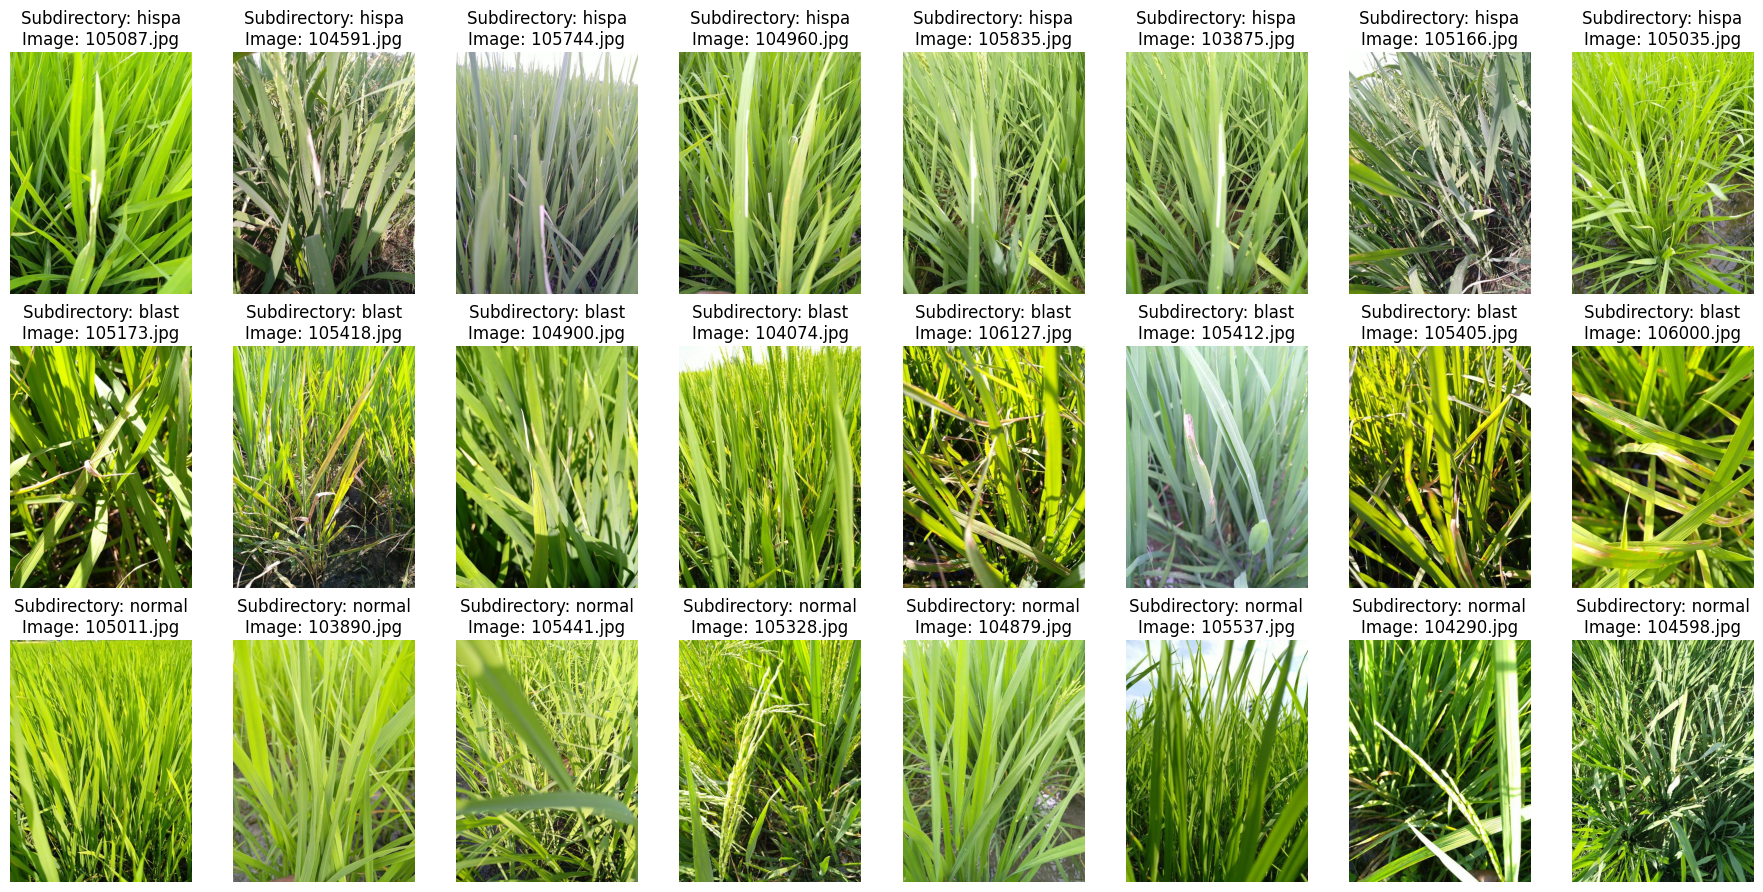

In [34]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Set the main directory path
main_dir = '/content/drive/MyDrive/Colab Notebooks/paddy-disease-classification'

# Navigate to the train images directory
train_dir = os.path.join(main_dir, 'train_images')

# List all subdirectories within the train images directory
subdirectories = [subdir for subdir in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, subdir))]

# Set up a 3x8 grid of subplots for displaying images
plt.figure(figsize=(18, 9))
for i, subdir in enumerate(subdirectories):
    subdir_path = os.path.join(train_dir, subdir)

    # List all image files in the current subdirectory
    image_files = [file for file in os.listdir(subdir_path) if file.lower().endswith(('.png', '.jpg', '.jpeg'))]

    # Display up to 8 images from the current subdirectory
    for j in range(min(8, len(image_files))):  # Display up to 8 images
        if (i * 8 + j) >= 24:
            break  # Break loop if we have displayed 24 images
        image_path = os.path.join(subdir_path, image_files[j])
        img = mpimg.imread(image_path)

        # Add subplot to the grid
        plt.subplot(3, 8, i * 8 + j + 1)
        plt.imshow(img)
        plt.title(f'Subdirectory: {subdir}\nImage: {image_files[j]}')
        plt.axis('off')

plt.tight_layout()
plt.show()


<Axes: ylabel='label'>

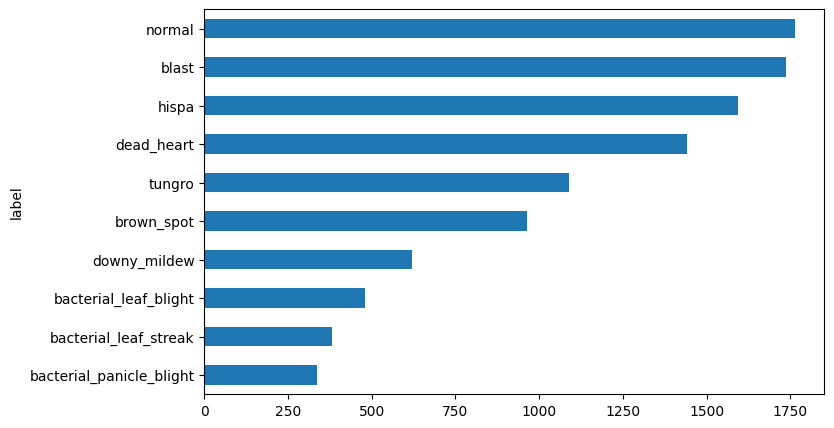

In [7]:
# ## distribution of labels
meta.groupby('label')['label'].count().sort_values().plot.barh(figsize=(8,5))

<Axes: ylabel='label'>

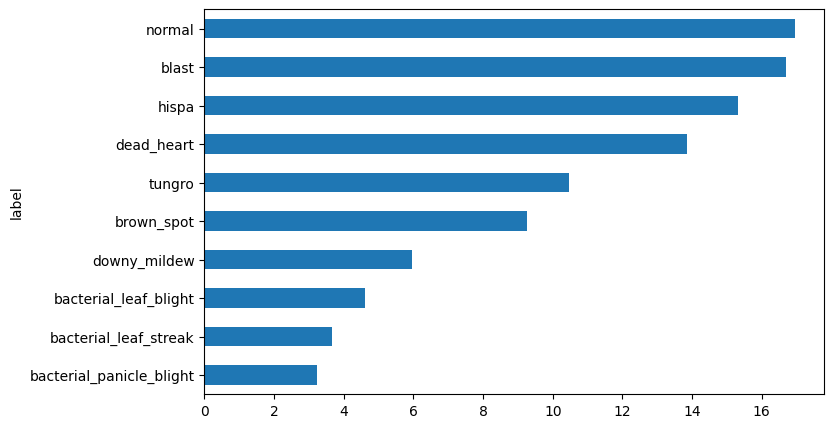

In [8]:
# ## distribution of labels in percentage
(meta.groupby('label')['label'].count().sort_values() / meta.shape[0] * 100).plot.barh(figsize=(8,5))

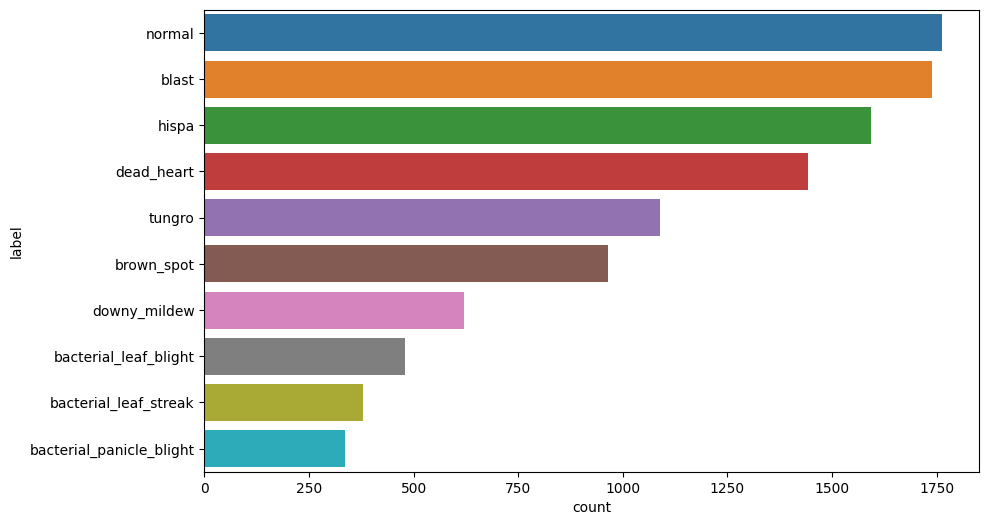

normal                      1764
blast                       1738
hispa                       1594
dead_heart                  1442
tungro                      1088
brown_spot                   965
downy_mildew                 620
bacterial_leaf_blight        479
bacterial_leaf_streak        380
bacterial_panicle_blight     337
Name: label, dtype: int64


In [9]:
fig,ax = plt.subplots(figsize = (10, 6))
sns.countplot(y = 'label',
              data = meta,
              order = meta['label'].value_counts().index)
plt.show()
print(meta["label"].value_counts())

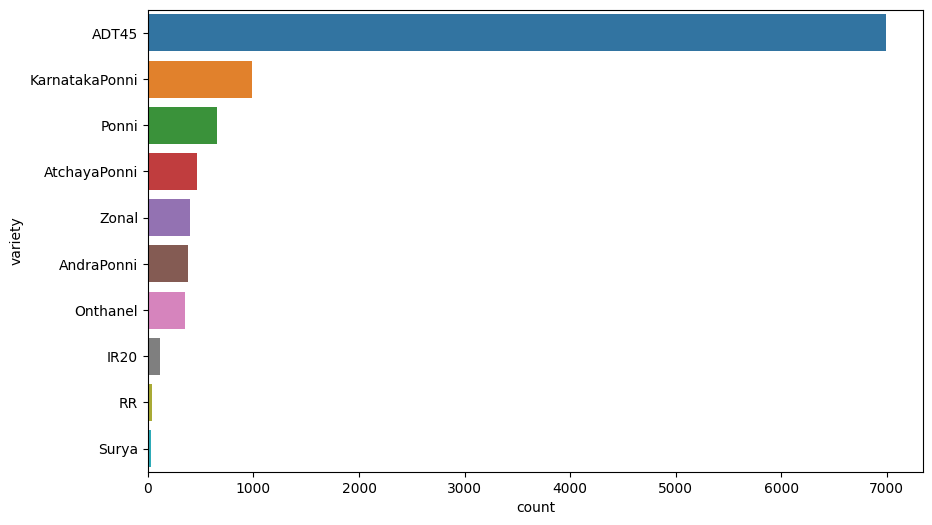

ADT45             6992
KarnatakaPonni     988
Ponni              657
AtchayaPonni       461
Zonal              399
AndraPonni         377
Onthanel           351
IR20               114
RR                  36
Surya               32
Name: variety, dtype: int64


In [10]:
fig,ax = plt.subplots(figsize = (10, 6))
sns.countplot(y = 'variety',
              data = meta,
              order = meta['variety'].value_counts().index)
plt.show()
print(meta["variety"].value_counts())

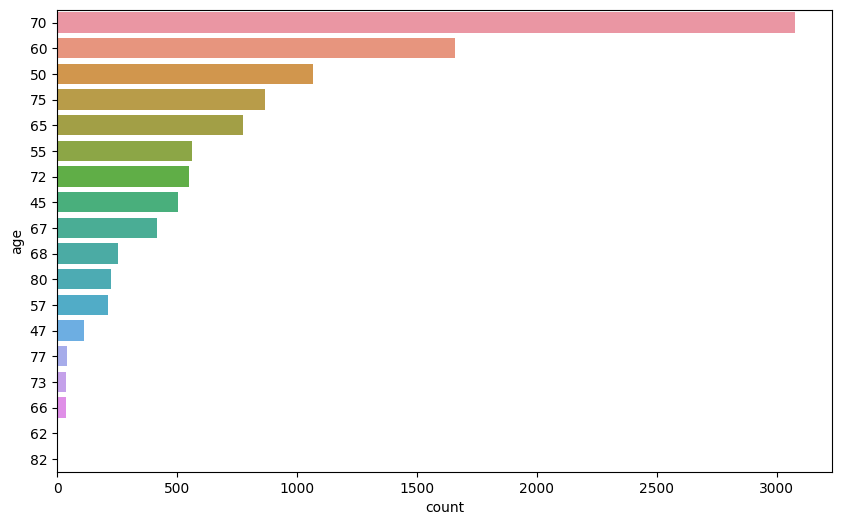

70    3077
60    1660
50    1066
75     866
65     774
55     563
72     552
45     505
67     415
68     253
80     225
57     213
47     112
77      42
73      38
66      36
62       5
82       5
Name: age, dtype: int64


In [11]:
fig,ax = plt.subplots(figsize = (10, 6))
sns.countplot(y = 'age',
              data = meta,
              order = meta['age'].value_counts().index)
plt.show()
print(meta["age"].value_counts())

<Axes: xlabel='age', ylabel='Density'>

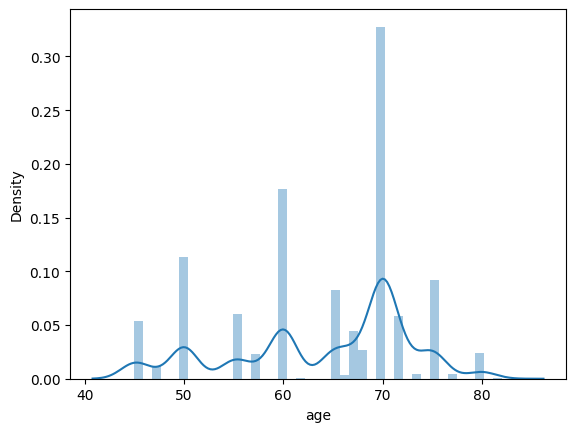

In [12]:
sns.distplot(meta["age"])

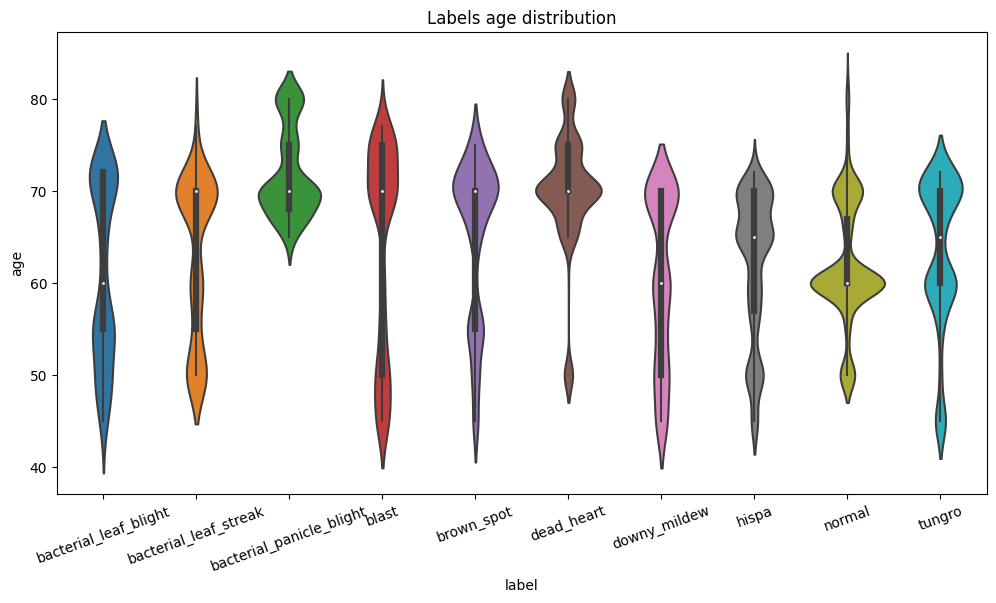

In [13]:
fig,ax = plt.subplots(figsize = (12, 6))
ax.set_xticklabels(meta["label"].index, rotation = 20)
ax.set_title("Labels age distribution")
sns.violinplot(x = "label", y = "age", data = meta)
plt.show()

<Axes: xlabel='label', ylabel='count'>

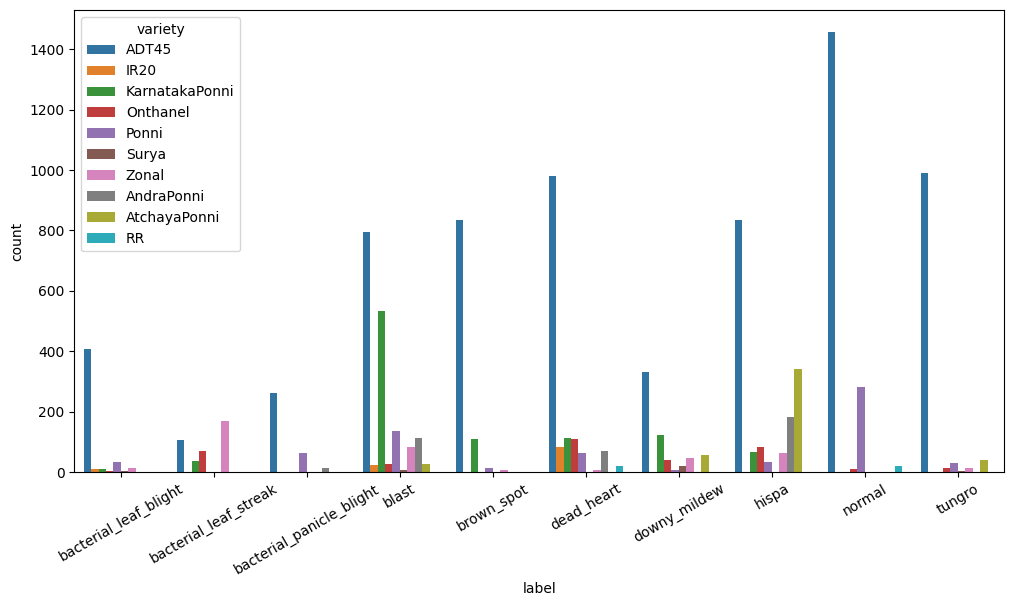

In [14]:
fig,ax = plt.subplots(figsize = (12, 6))
ax.set_xticklabels(meta["label"].index, rotation = 30)
sns.countplot(x = "label", hue = "variety", data = meta)

## 2. Verify the files in the train and test directories

In [15]:
import glob
from pathlib import Path

##For Google Colab
train_path = '/content/drive/MyDrive/Colab Notebooks/paddy-disease-classification/train_images'
test_path  = '/content/drive/MyDrive/Colab Notebooks/paddy-disease-classification/test_images'

print('training set')
for filepath in glob.glob(train_path + '/*/'):
  files = glob.glob(filepath + '*')
  print(f"{len(files)} \t {Path(filepath).name}")

print('testing set')
for filepath in glob.glob(test_path + '/*/'):
  files = glob.glob(filepath + '*')
  print(f"{len(files)} \t {Path(filepath).name}")

training set
1594 	 hispa
1738 	 blast
1764 	 normal
479 	 bacterial_leaf_blight
620 	 downy_mildew
1088 	 tungro
380 	 bacterial_leaf_streak
965 	 brown_spot
1442 	 dead_heart
337 	 bacterial_panicle_blight
testing set


## Import the necesary python libraries

In [16]:
import os
import random
from os import listdir
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation, Flatten, Dropout, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend
import matplotlib.pyplot as plt

In [17]:
SEED = 1234
def set_seed(seed=SEED):
    np.random.seed(seed)
    tf.random.set_seed(seed)
    random.seed(seed)
    os.environ['TF_DETERMINISTIC_OPS'] = "1"
    os.environ['TF_CUDNN_DETERMINISM'] = "1"
    os.environ['PYTHONHASHSEED'] = str(seed)
set_seed()

## Define the necessary constants

In [35]:
SEED = 1234
EPOCHS = 100
INIT_LR = 1e-3
BS = 32
default_image_size = tuple((256, 256))
image_size = 0
width = 256
height = 256
depth = 3
n_classes = len(glob.glob(train_path + '/*/'))
print(n_classes)

10


## 3. Dataset preparation (train, validate, and test sets)

### 3a. Setup ImageDataGenerator with different image transformation options to generate diverse training samples.

In [36]:
image_datagen = ImageDataGenerator(featurewise_center=False,
                                   samplewise_center=False,
                                   featurewise_std_normalization=False,
                                   samplewise_std_normalization=False,
                                   zca_whitening=False,
                                   rotation_range=5,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   width_shift_range=0.05,
                                   height_shift_range=0.05,
                                   channel_shift_range=0.,
                                   fill_mode='nearest',
                                   horizontal_flip=True,
                                   vertical_flip=False,
                                   rescale=1./255,
                                   validation_split=0.2)

### 3b. Next, let's configure the train, validate, and test data generators usingflow_from_directory

In [37]:
train_generator = image_datagen.flow_from_directory(
    directory = train_path,
    subset='training',
    target_size=(256, 256),
color_mode="rgb", batch_size=32, class_mode="categorical", shuffle=True,
seed=SEED)
valid_generator = image_datagen.flow_from_directory(
    directory=train_path,
    subset='validation',
    target_size=(256, 256),
color_mode="rgb", batch_size=32, class_mode="categorical", shuffle=True,
    seed=SEED)
print(train_generator.class_indices)
print(train_generator.samples)

Found 8330 images belonging to 10 classes.
Found 2077 images belonging to 10 classes.
{'bacterial_leaf_blight': 0, 'bacterial_leaf_streak': 1, 'bacterial_panicle_blight': 2, 'blast': 3, 'brown_spot': 4, 'dead_heart': 5, 'downy_mildew': 6, 'hispa': 7, 'normal': 8, 'tungro': 9}
8330


# 4. CNN model

In [38]:
def get_model():
  model = Sequential()
  inputShape = (height, width, depth)
  chanDim = -1
  print(backend.image_data_format())
  if backend.image_data_format() == "channels_first":
          inputShape = (depth, height, width)
          chanDim = 1
  model.add(Conv2D(32, (3, 3), padding="same",input_shape=inputShape))
  model.add(Activation("relu"))
  model.add(BatchNormalization(axis=chanDim))
  model.add(MaxPooling2D(pool_size=(3, 3)))
  model.add(Dropout(0.25))
  model.add(Conv2D(64, (3, 3), padding="same"))
  model.add(Activation("relu"))
  model.add(BatchNormalization(axis=chanDim))
  model.add(Conv2D(64, (3, 3), padding="same"))
  model.add(Activation("relu"))
  model.add(BatchNormalization(axis=chanDim))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))
  model.add(Conv2D(128, (3, 3), padding="same"))
  model.add(Activation("relu"))
  model.add(BatchNormalization(axis=chanDim))
  model.add(Conv2D(128, (3, 3), padding="same"))
  model.add(Activation("relu"))
  model.add(BatchNormalization(axis=chanDim))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))
  model.add(Flatten())
  model.add(Dense(1024))
  model.add(Activation("relu"))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))
  model.add(Dense(n_classes))
  model.add(Activation("softmax"))
  # opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
  opt = Adam(learning_rate=INIT_LR)
  # distribution
  model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])
  return model

channels_last


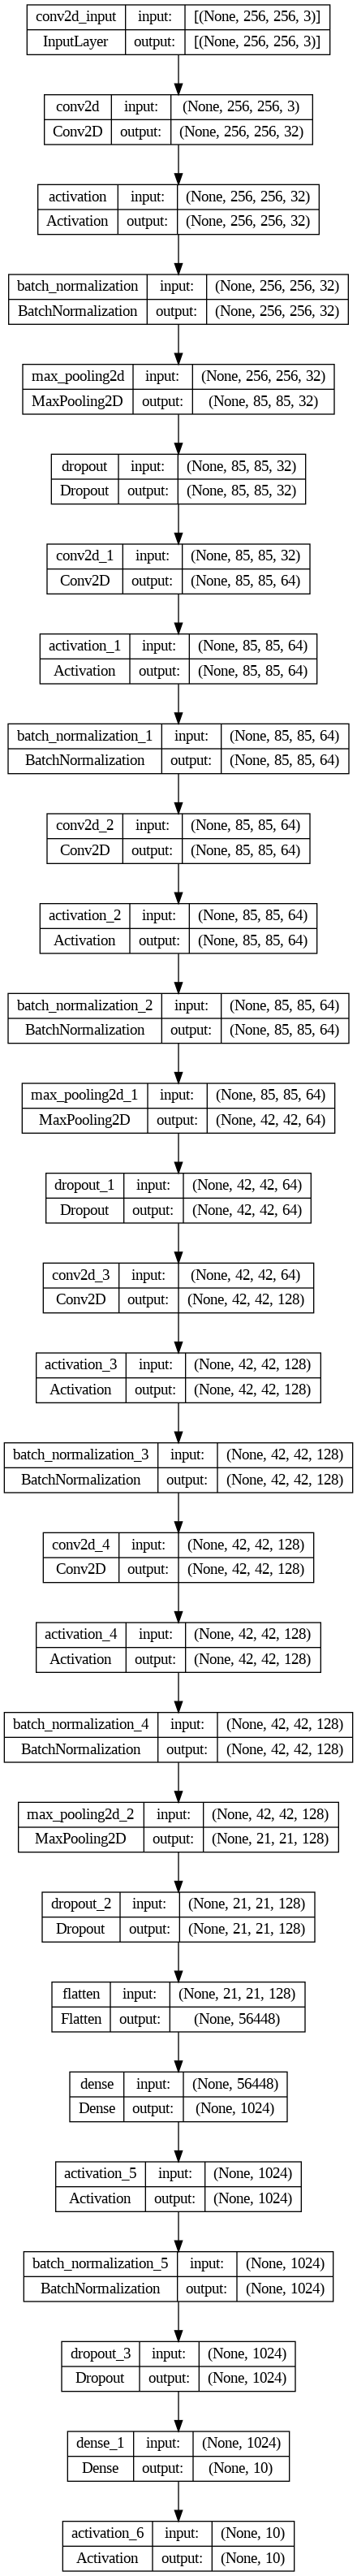

In [39]:
model = get_model()
plot_model(model, 'cnn-model.png', show_shapes=True)

# 5. Model training

### 5a. (Optional) Setup and configure training checkpoints, early stopping, and ploting call backs to lively visualize the training

In [40]:
try:
  import livelossplot
except:
  !pip install livelossplot

from livelossplot.inputs.keras import PlotLossesCallback

plot_loss = PlotLossesCallback()

# ModelCheckpoint callback - save best weights
checkpoint = ModelCheckpoint(filepath='paddy-doctor-small-cnn.best.hdf5',
                             save_best_only=True,
                             verbose=1)

# EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',
                           patience=10,
                           restore_best_weights=True,
                           mode='min')